In [28]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class my_network(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.weight_0 = torch.nn.Parameter(torch.randn(()))
    self.weight_1 = torch.nn.Parameter(torch.randn(()))
    self.weight_2 = torch.nn.Parameter(torch.randn(()))
    self.weight_3 = torch.nn.Parameter(torch.randn(()))

  def forward(self, input):
    return self.weight_0 + self.weight_1 * input + \
           self.weight_2 * input.pow(2)  + self.weight_3 * input.pow(3)


在使用torch.nn.Module过程中，其中的\__init__函数重写过程中，如果让变量加入生成器parameters，

则需要将变量一一写出为上述格式。当使用self.\__dict__写入属性中，则无法进入生成器中。

目前已知的方法只有一一写变量。至于使用列表推导式初始化生成器则不在考虑范围内。

希望使用数组方式，自动化生成变量列表之后计算，但是无法存储到parameters的生成器，则无法使用。

In [38]:
class calculate():
  def __init__(self):
    self.value_x = torch.linspace(-math.pi, math.pi, 2000)
    self.value_y = self.target_function(self.value_x)

    self.loss_function = torch.nn.MSELoss()

    self.predict_model = my_network()
    self.optimizer = torch.optim.Adam(self.predict_model.parameters(), lr=1e-3)

  def start_execute(self):
    for i in range(8000):
      self.predict_y = self.predict_model(self.value_x)
      loss = self.loss_function(self.value_y, self.predict_y)
      if (i+1) % 1000 == 0:
        print('loss is %-10s'%loss)
      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

  def target_function(self, value_x):
    return torch.sin(value_x)

In [ ]:
test_demo = calculate()
test_demo.start_execute()

list length is 4
loss is tensor(8.9639, grad_fn=<MseLossBackward>)
loss is tensor(0.1328, grad_fn=<MseLossBackward>)
loss is tensor(0.0339, grad_fn=<MseLossBackward>)
loss is tensor(0.0169, grad_fn=<MseLossBackward>)
loss is tensor(0.0112, grad_fn=<MseLossBackward>)
loss is tensor(0.0072, grad_fn=<MseLossBackward>)
loss is tensor(0.0050, grad_fn=<MseLossBackward>)
loss is tensor(0.0045, grad_fn=<MseLossBackward>)


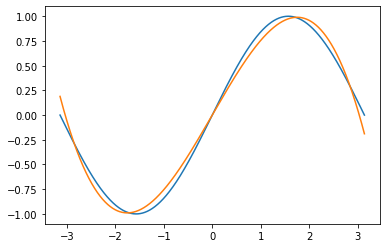

In [ ]:
plt.plot(test_demo.value_x.tolist(), test_demo.value_y.tolist())
plt.plot(test_demo.value_x.tolist(), test_demo.predict_y.tolist())

In [58]:
class dynamic_net(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.weight_a = torch.nn.Parameter(torch.randn(()))
    self.weight_b = torch.nn.Parameter(torch.randn(()))
    self.weight_c = torch.nn.Parameter(torch.randn(()))
    self.weight_d = torch.nn.Parameter(torch.randn(()))
    self.weight_e = torch.nn.Parameter(torch.randn(()))
    self.weight_f = torch.nn.Parameter(torch.randn(()))

  def forward(self, input):
    output = self.weight_a + self.weight_b *input + self.weight_c * input.pow(2) + \
             self.weight_d * input.pow(3)
    for i in range(4, np.random.randint(4,6)):
      output += self.weight_e * input.pow(i)
      # if i == 4:
      #   output += self.weight_e * input.pow(i)
      # else:
      #   output += self.weight_f * input.pow(i)
    return output

In [59]:
class calculate2(calculate):
  def __init__(self):
    super().__init__()
    self.loss_function = torch.nn.MSELoss(reduction='sum')
    self.predict_model = dynamic_net()
    self.optimizer = torch.optim.Adam(self.predict_model.parameters(), lr=1e-3)


In [62]:
test_demo2 = calculate2()
test_demo2.start_execute()

loss is tensor(11536.7578, grad_fn=<MseLossBackward>)
loss is tensor(53.9485, grad_fn=<MseLossBackward>)
loss is tensor(12.9934, grad_fn=<MseLossBackward>)
loss is tensor(11.3075, grad_fn=<MseLossBackward>)
loss is tensor(10.0985, grad_fn=<MseLossBackward>)
loss is tensor(9.2545, grad_fn=<MseLossBackward>)
loss is tensor(8.8910, grad_fn=<MseLossBackward>)
loss is tensor(8.8210, grad_fn=<MseLossBackward>)


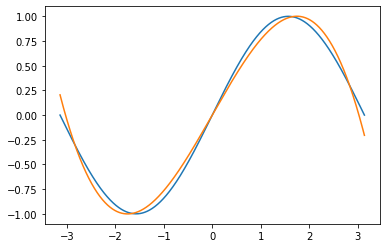

In [63]:
plt.plot(test_demo2.value_x.tolist(), test_demo2.value_y.tolist())
plt.plot(test_demo2.value_x.tolist(), test_demo2.predict_y.tolist())